Import libraries

In [1]:
from textblob import TextBlob
import pandas as pd

Define function untuk sentiment

In [2]:
from textblob import TextBlob

def getSubjectivity(review) :
    return TextBlob(review).sentiment.subjectivity

def getPolarity(review) :
    return TextBlob(review).sentiment.polarity

def analyze(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

Mengambil data dari yang sudah diproses dan ditranslate ke bahasa inggris (karena text blob hanya bisa Bahasa Inggris)

In [3]:
df = pd.read_csv('3.5_translated_processed_data_g20.csv')
df.head()

final_data = pd.DataFrame(df[['date', 'username', 'tweet_en']])
final_data.head()

,date,username,tweet_en
0,2022-10-05 12:21:14,jeslintuse2,east nusa tenggara government ensures hotels b...
1,2022-10-05 12:17:55,usharanimuni,government makes sure hotel bali ready welcome...
2,2022-10-05 12:13:03,diaharmayanti1,government makes sure hotel bali ready welcome...
3,2022-10-05 12:12:31,SeptianiMestika,bali compendium brought indonesia g20 summit n...
4,2022-10-05 12:11:59,diaharmayanti1,indonesian telecommunications network readines...


Apply sentiment dengan subjetivitas, polaritas dan analisis

In [4]:
final_data[ 'Subjectivity'] = final_data['tweet_en'].apply(getSubjectivity)
final_data['Polarity'] = final_data['tweet_en'].apply(getPolarity)
final_data['Analysis'] = final_data['Polarity'].apply(analyze)
final_data.head()

final_data.to_csv('4_sentiment_analysis_data_g20.csv', index=False)

Hitung jumlah hasil analisis

In [5]:
tb_counts = final_data.Analysis.value_counts()
tb_counts

Positive    507
Neutral     502
Negative     57
Name: Analysis, dtype: int64

Preview data hasil analisis sentimen

In [6]:
j=1
sortedDF = final_data.sort_values(by=['Polarity']) #Sort the tweets
for i in range(0, sortedDF.shape[0] ):
    if( sortedDF['Analysis'][i] == 'Negative'):
        print(str(j) + ') '+ sortedDF['tweet_en'][i])
        print()
        j = j + 1

1) minister communication information johnny plate kemkominfo prepared media center summit g20 capacity 1 500 media centers located bicc hotel westin nusa dua bali operate starting 13th november 17, 2022

2) luhut pandjaitan's orders bali firmly invited local drivers involved g20 summit

3) order coordinating minister marves luhut pandjaitan bali firmly invited local drivers take advantage involved g20 luhutpandjaitan summit

4) ministry communication information prepares media center accommodate 1 500 journalists covered high level conference g20 summit bali international convention center bicc nusa dua bali province 15 november 1622

5) minister communication information said prepared media center g20 summit capacity 1 500 media centers located bali international convention center bicc hotel westin nusa dua bali would operate starting 13 november 2022

6) green friend president republic indonesia accompanied minister pupr minister foreign affairs deputy minister lhk reviewed tahura n

Buat Pie Chart

([<matplotlib.patches.Wedge at 0x1ce79a8d070>,
 [Text(0.08420420066124705, 1.096772379571532, 'Positive'),
  Text(-0.2663937651228425, -1.0672555279330607, 'Neutral'),
  Text(1.3309971848892612, -0.22571330004424173, 'Negative')],
 [Text(0.045929563997043836, 0.5982394797662901, '47.6%'),
  Text(-0.145305690067005, -0.5821393788725785, '47.1%'),
  Text(0.8380352645599052, -0.14211578150933737, '5.3%')])

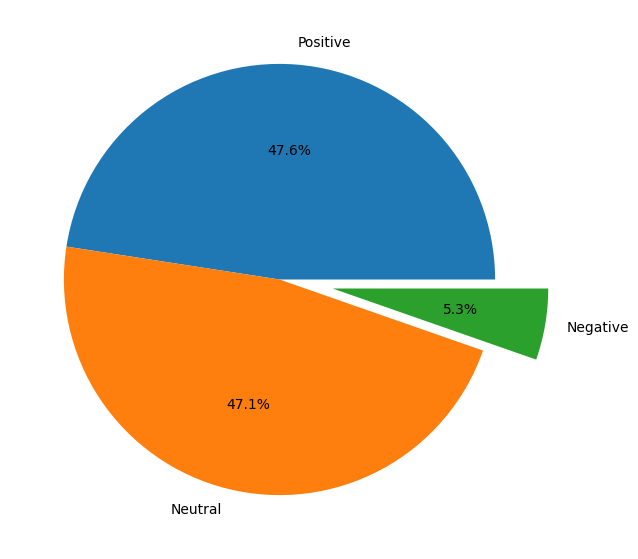

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(10, 7))
plt.pie(tb_counts.values, labels=tb_counts.index, explode=(0,0,0.25), autopct='%1.1f%%', shadow=False)


Buat Bar Chart

<AxesSubplot: title={'center': 'Sentiment Analysis'}, xlabel='Sentimen', ylabel='Jumlah Tweet'>

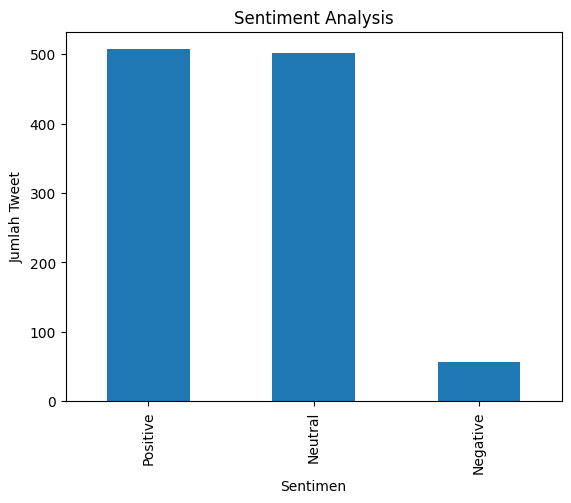

In [8]:
final_data['Analysis'].value_counts().plot(kind='bar', title='Sentiment Analysis', xlabel='Sentimen', ylabel='Jumlah Tweet')

In [9]:
datafix = final_data[final_data['tweet_en'] != '']
datafix.Analysis.value_counts()

Positive    507
Neutral     502
Negative     57
Name: Analysis, dtype: int64

Memastikan jumlah data sama dengan jumlah data raw di awal

In [10]:
datafix.count()

date            1066
username        1066
tweet_en        1066
Subjectivity    1066
Polarity        1066
Analysis        1066
dtype: int64

Import Sklearn untuk training dan testing model

In [11]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer, HashingVectorizer

In [12]:
cvec=CountVectorizer()
tvec=TfidfVectorizer()
hvec=HashingVectorizer()

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC

clf1 = RandomForestClassifier()
clf2 = LogisticRegression()
clf3 = BernoulliNB()
clf4 = SVC()

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X=final_data.tweet_en
y=final_data.Analysis

Split data train dan test

In [16]:
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=225)

In [17]:
print('Banyak data x_train :',len(x_train))
print('Banyak data x_test  :',len(x_test))
print('Banyak data y_train :',len(y_train))
print('Banyak data y_test  :',len(y_test))

Banyak data x_train : 799
Banyak data x_test  : 267
Banyak data y_train : 799
Banyak data y_test  : 267


In [18]:
from sklearn.pipeline import Pipeline

In [19]:
model= Pipeline([('vectorizer',tvec)
                 ,('classifier',clf1)])
model2= Pipeline([('vectorizer',tvec)
                 ,('classifier',clf2)])
model3= Pipeline([('vectorizer',tvec)
                 ,('classifier',clf3)])
model4= Pipeline([('vectorizer',tvec)
                 ,('classifier',clf4)])

In [20]:
model.fit(x_train,y_train)
model2.fit(x_train,y_train)
model3.fit(x_train,y_train)
model4.fit(x_train,y_train)

Pipeline(steps=[('vectorizer', TfidfVectorizer()), ('classifier', SVC())])

In [21]:
hasil=model.predict(x_test)
hasil2=model2.predict(x_test)
hasil3=model3.predict(x_test)
hasil4=model4.predict(x_test)

In [22]:
from sklearn.metrics import accuracy_score,confusion_matrix

Analisis akurasi model dengan confusion matrix dan classification report

In [23]:
import numpy as np


def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

In [24]:
y_test.value_counts()

Positive    126
Neutral     124
Negative     17
Name: Analysis, dtype: int64

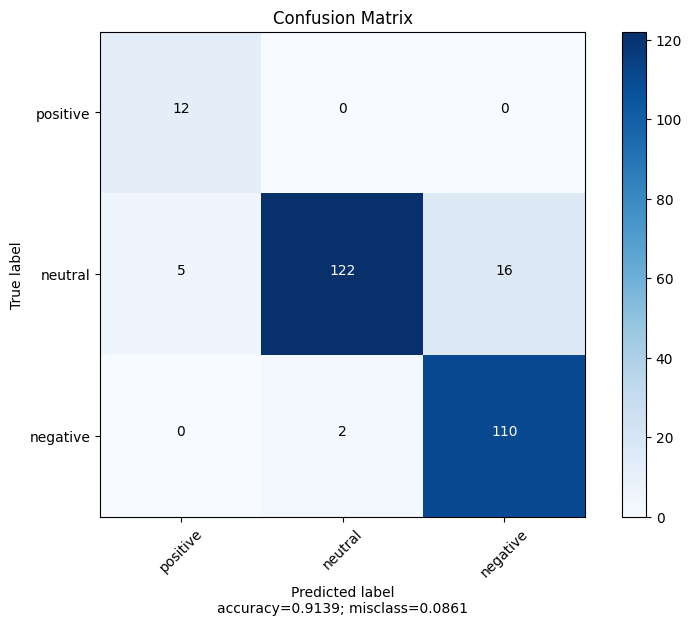

<Figure size 640x480 with 0 Axes>

In [25]:
plot_confusion_matrix(cm           = confusion_matrix(hasil,y_test), 
                      normalize    = False,
                      target_names = ['positive', 'neutral', 'negative'],
                      title        = "Confusion Matrix")

plt.savefig('hasil.png',bbox_inches='tight')

In [26]:
from sklearn.metrics import classification_report
matrix = classification_report(y_test,hasil)
print('Classification report : \n',matrix)

Classification report : 
               precision    recall  f1-score   support

    Negative       1.00      0.71      0.83        17
     Neutral       0.85      0.98      0.91       124
    Positive       0.98      0.87      0.92       126

    accuracy                           0.91       267
   macro avg       0.95      0.85      0.89       267
weighted avg       0.92      0.91      0.91       267



In [27]:
print(accuracy_score(hasil,y_test))

0.9138576779026217


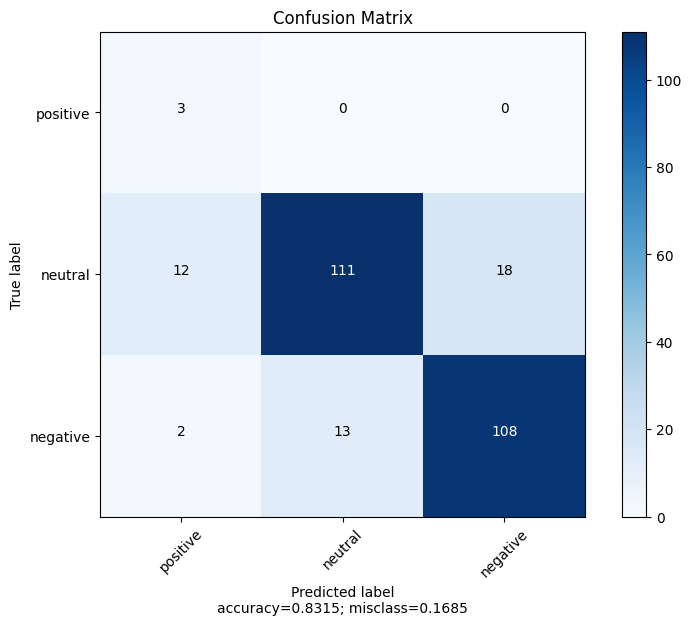

<Figure size 640x480 with 0 Axes>

In [28]:
plot_confusion_matrix(cm           = confusion_matrix(hasil2,y_test), 
                      normalize    = False,
                      target_names = ['positive', 'neutral', 'negative'],
                      title        = "Confusion Matrix")

plt.savefig('hasil1.png',bbox_inches='tight')

In [29]:
from sklearn.metrics import classification_report
matrix = classification_report(y_test,hasil2)
print('Classification report : \n',matrix)

Classification report : 
               precision    recall  f1-score   support

    Negative       1.00      0.18      0.30        17
     Neutral       0.79      0.90      0.84       124
    Positive       0.88      0.86      0.87       126

    accuracy                           0.83       267
   macro avg       0.89      0.64      0.67       267
weighted avg       0.84      0.83      0.82       267



In [30]:
print('Accuracy score :',accuracy_score(hasil2,y_test))

Accuracy score : 0.8314606741573034


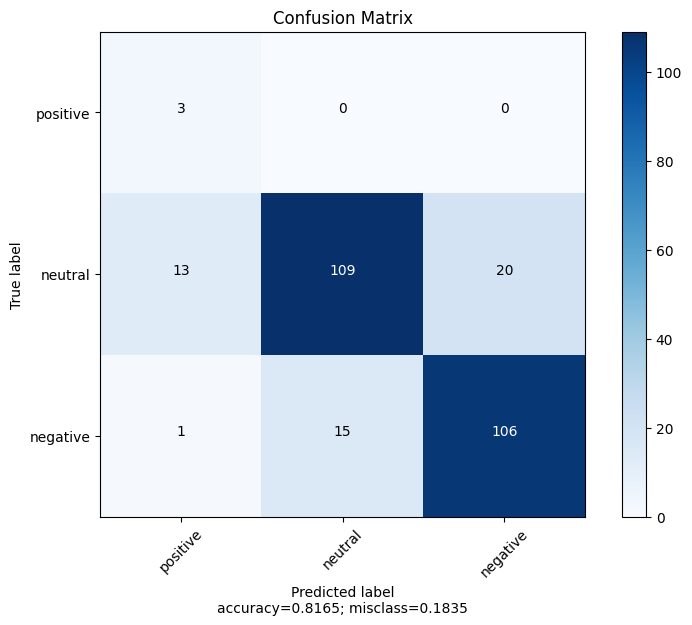

<Figure size 640x480 with 0 Axes>

In [31]:
plot_confusion_matrix(cm           = confusion_matrix(hasil3,y_test), 
                      normalize    = False,
                      target_names = ['positive', 'neutral', 'negative'],
                      title        = "Confusion Matrix")

plt.savefig('hasil2.png',bbox_inches='tight')

In [32]:
from sklearn.metrics import classification_report
matrix = classification_report(y_test,hasil3)
print('Classification report : \n',matrix)

Classification report : 
               precision    recall  f1-score   support

    Negative       1.00      0.18      0.30        17
     Neutral       0.77      0.88      0.82       124
    Positive       0.87      0.84      0.85       126

    accuracy                           0.82       267
   macro avg       0.88      0.63      0.66       267
weighted avg       0.83      0.82      0.80       267



In [33]:
print('Accuracy score :',accuracy_score(hasil3,y_test))

Accuracy score : 0.8164794007490637


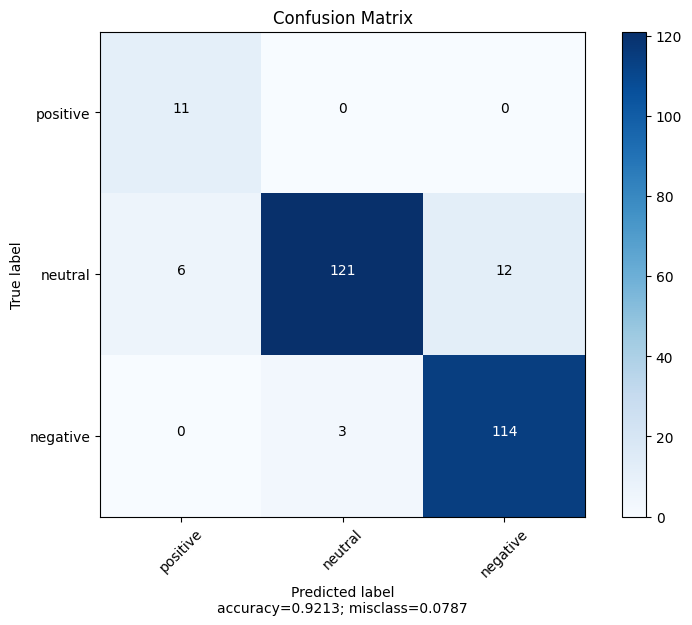

In [34]:
plot_confusion_matrix(cm           = confusion_matrix(hasil4,y_test), 
                      normalize    = False,
                      target_names = ['positive', 'neutral', 'negative'],
                      title        = "Confusion Matrix")

In [35]:
from sklearn.metrics import classification_report
matrix = classification_report(y_test,hasil4)
print('Classification report : \n',matrix)

Classification report : 
               precision    recall  f1-score   support

    Negative       1.00      0.65      0.79        17
     Neutral       0.87      0.98      0.92       124
    Positive       0.97      0.90      0.94       126

    accuracy                           0.92       267
   macro avg       0.95      0.84      0.88       267
weighted avg       0.93      0.92      0.92       267



Hasil Accuracy setelah test terakhir

In [36]:
print('Accuracy score :', accuracy_score(hasil4,y_test))

Accuracy score : 0.9213483146067416


Ambil translate data kembali ke Bahasa Indonesia untuk melihat hasil sentimen

In [37]:
# extracting the number of examples of each class

df = pd.read_csv('4.1_translated_sentiment_analysis_data_g20.csv')
df.head()

fix_data = pd.DataFrame(df[['date', 'username', 'tweet', 'Subjectivity', 'Polarity', 'Analysis']])
fix_data.head()


,date,username,tweet,Subjectivity,Polarity,Analysis
0,2022-10-05 12:21:14,jeslintuse2,Pemerintah Tenggara Nusa Timur Memastikan Hote...,0.700000,0.5,Positive
1,2022-10-05 12:17:55,usharanimuni,Pemerintah Memastikan Hotel Bali Siap Selamat ...,0.762963,0.5,Positive
2,2022-10-05 12:13:03,diaharmayanti1,Pemerintah Memastikan Hotel Bali Siap Selamat ...,0.762963,0.5,Positive
3,2022-10-05 12:12:31,SeptianiMestika,Bali Kompendium Membawa Indonesia G20 Summit N...,0.000000,0.0,Neutral
4,2022-10-05 12:11:59,diaharmayanti1,Jaringan telekomunikasi Indonesia kesiapan waj...,0.000000,0.0,Neutral


Memisahkan data positive, negative dan neutral

In [38]:

POS_data = fix_data[fix_data['Analysis'] == 'Positive']
NEG_data = fix_data[fix_data['Analysis'] == 'Negative']
NET_data = fix_data[fix_data['Analysis'] == 'Neutral']

Melihat summary data positive

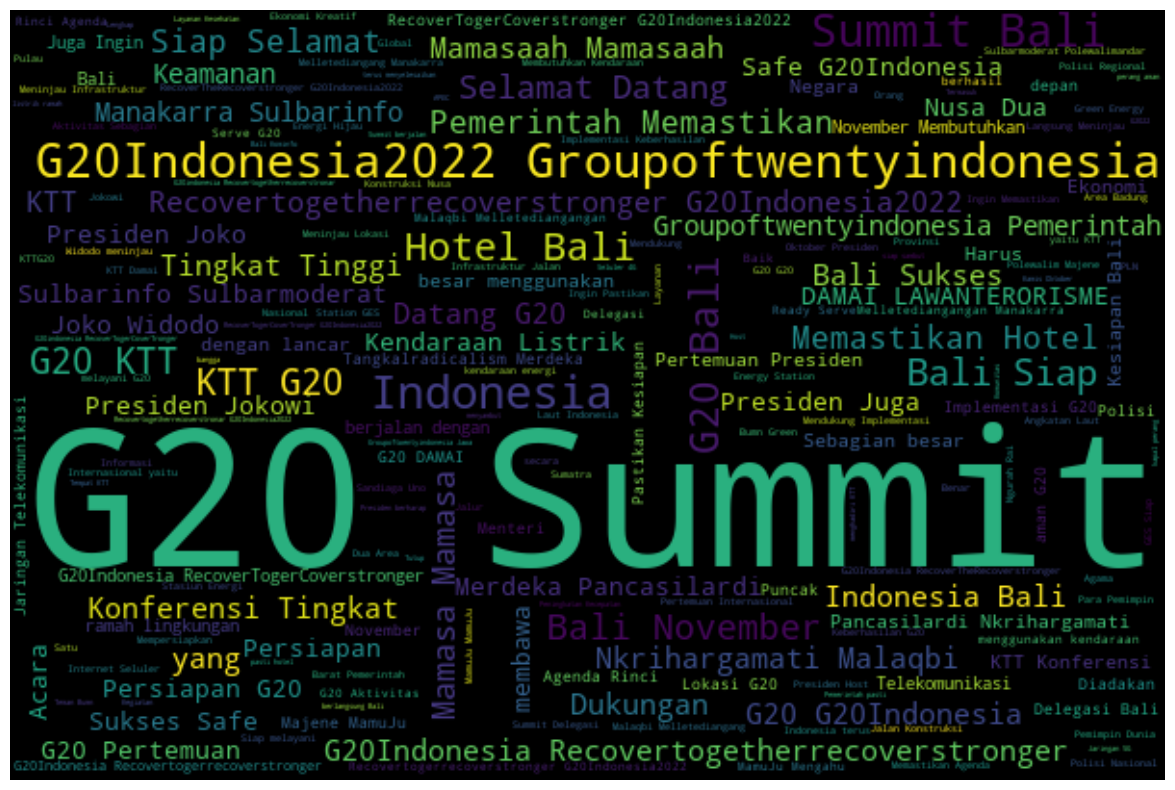

In [39]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

allWords  = ' '.join( [twts for twts in POS_data['tweet']])
wordCloud = WordCloud(width = 600, height=400, random_state=21, max_font_size=400).generate(allWords)

plt.figure( figsize=(20,10) )
plt.imshow(wordCloud, interpolation= 'bilinear')
plt.axis('off')
plt.show()

In [40]:
from collections import defaultdict
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('indonesian')
def generate_ngrams(text, n_gram=1):
    token = [token for token in text.lower().split(' ') if token != '' if token not in stop]
    ngrams = zip(*[token[i:] for i in range(n_gram)])
    return [' '.join(ngram) for ngram in ngrams]

N = 100

# Unigrams
positive_unigrams = defaultdict(int)

for tweet in POS_data['tweet']:
    for word in generate_ngrams(tweet):
        positive_unigrams[word] += 1
         
df_top_positive = pd.DataFrame(sorted(positive_unigrams.items(), key=lambda x: x[1])[::-1])
df_top_positive = df_top_positive.rename(columns={0:'Word',1:'Count'})

# Bigrams
positive_bigrams = defaultdict(int)

for tweet in POS_data['tweet']:
    for word in generate_ngrams(tweet,n_gram=2):
        positive_bigrams[word] += 1
        
df_top_positive_bi = pd.DataFrame(sorted(positive_bigrams.items(), key=lambda x: x[1])[::-1])
df_top_positive_bi = df_top_positive_bi.rename(columns={0:'Word',1:'Count'})

# Trigrams
positive_trigrams = defaultdict(int)

for tweet in POS_data['tweet']:
    for word in generate_ngrams(tweet,n_gram=3):
        positive_trigrams[word] += 1
        
df_top_positive_tri = pd.DataFrame(sorted(positive_trigrams.items(), key=lambda x: x[1])[::-1])
df_top_positive_tri = df_top_positive_tri.rename(columns={0:'Word',1:'Count'})

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\MrWaradana\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


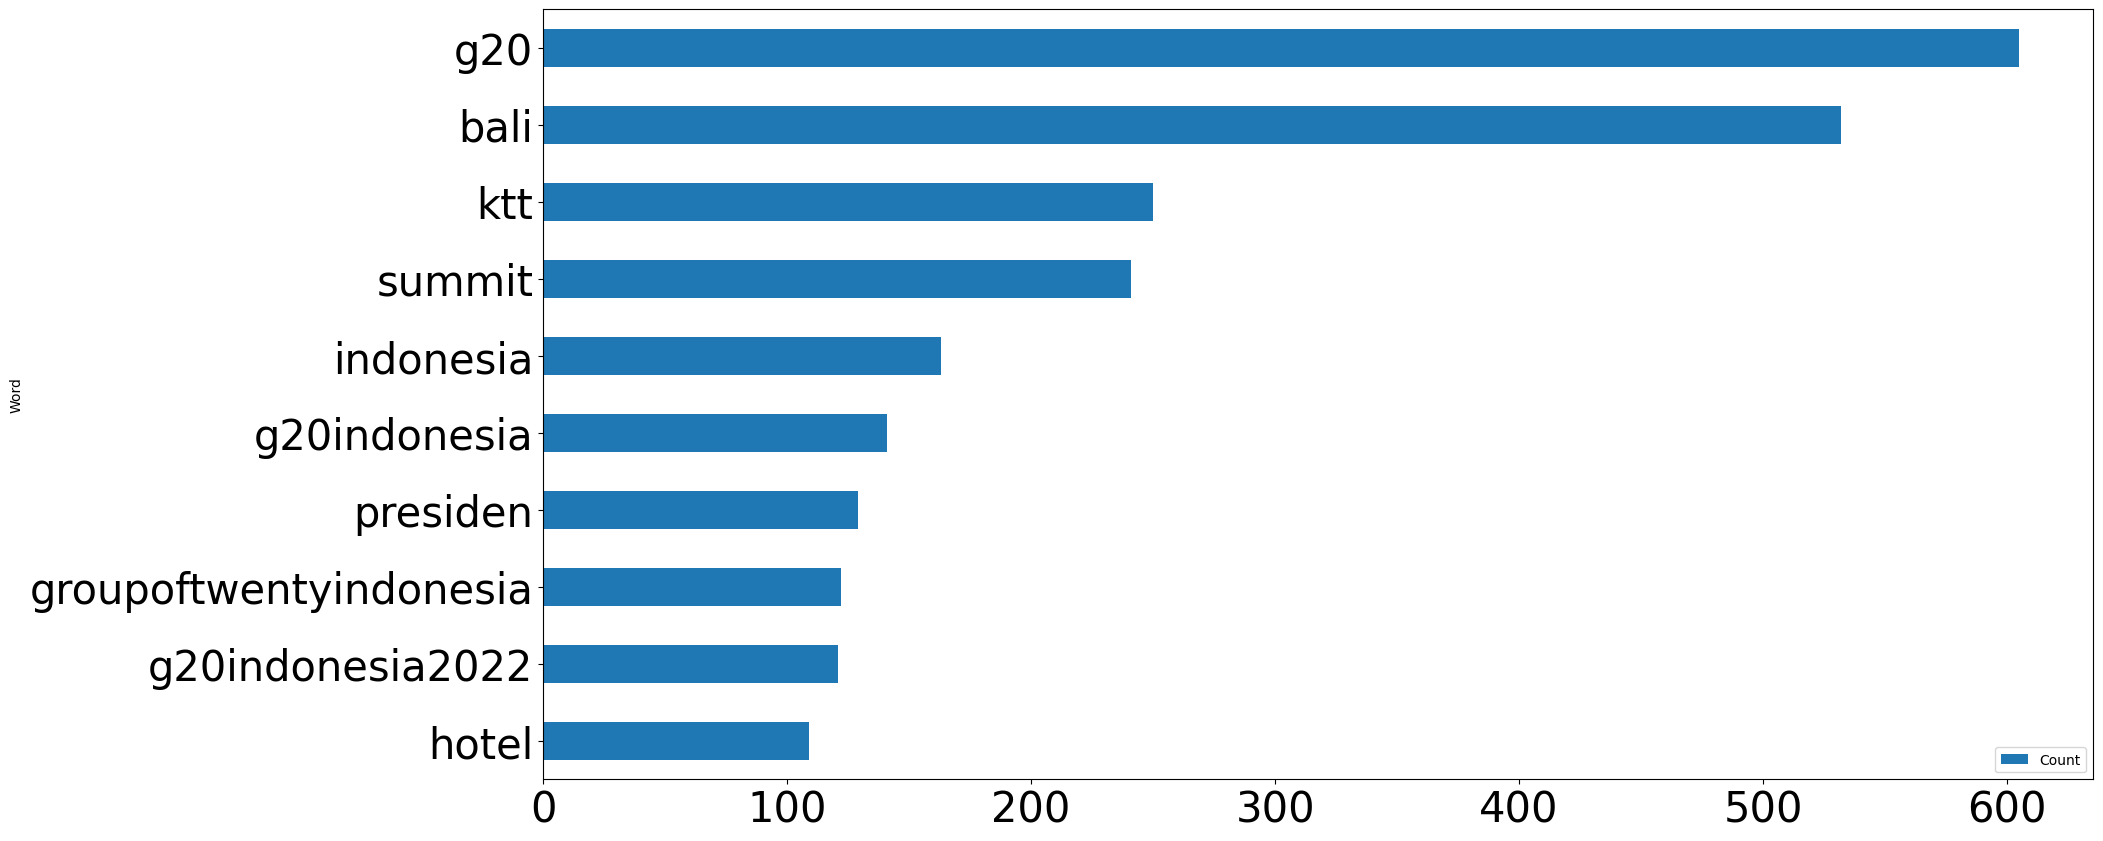

In [41]:
df_top_positive.head(10).sort_values(by='Count',ascending=True).plot.barh(x='Word', y='Count', rot=0,figsize=(20,10),fontsize=30)
plt.savefig('positif.png',bbox_inches='tight')

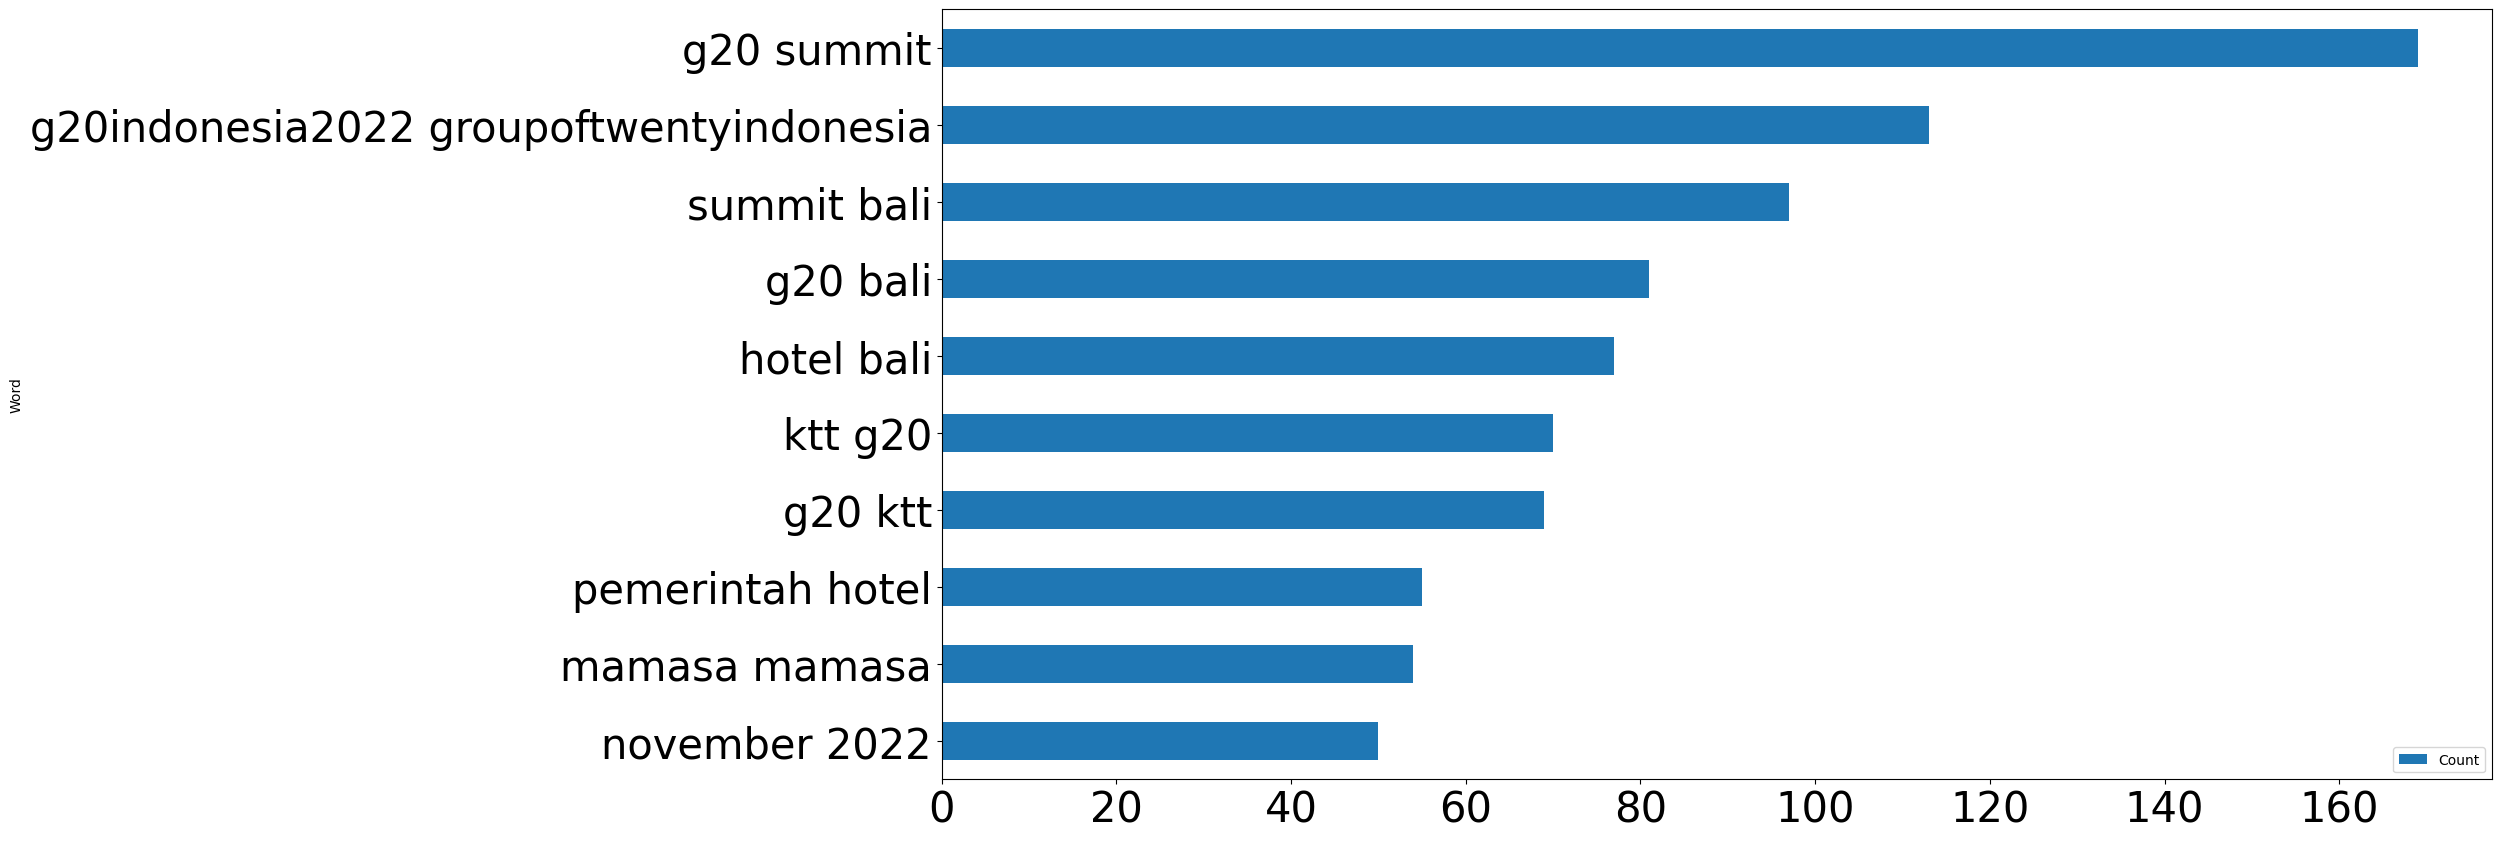

In [42]:
df_top_positive_bi.head(10).sort_values(by='Count',ascending=True).plot.barh(x='Word', y='Count', rot=0,figsize=(20,10),fontsize=30)
plt.savefig('positif1.png',bbox_inches='tight')

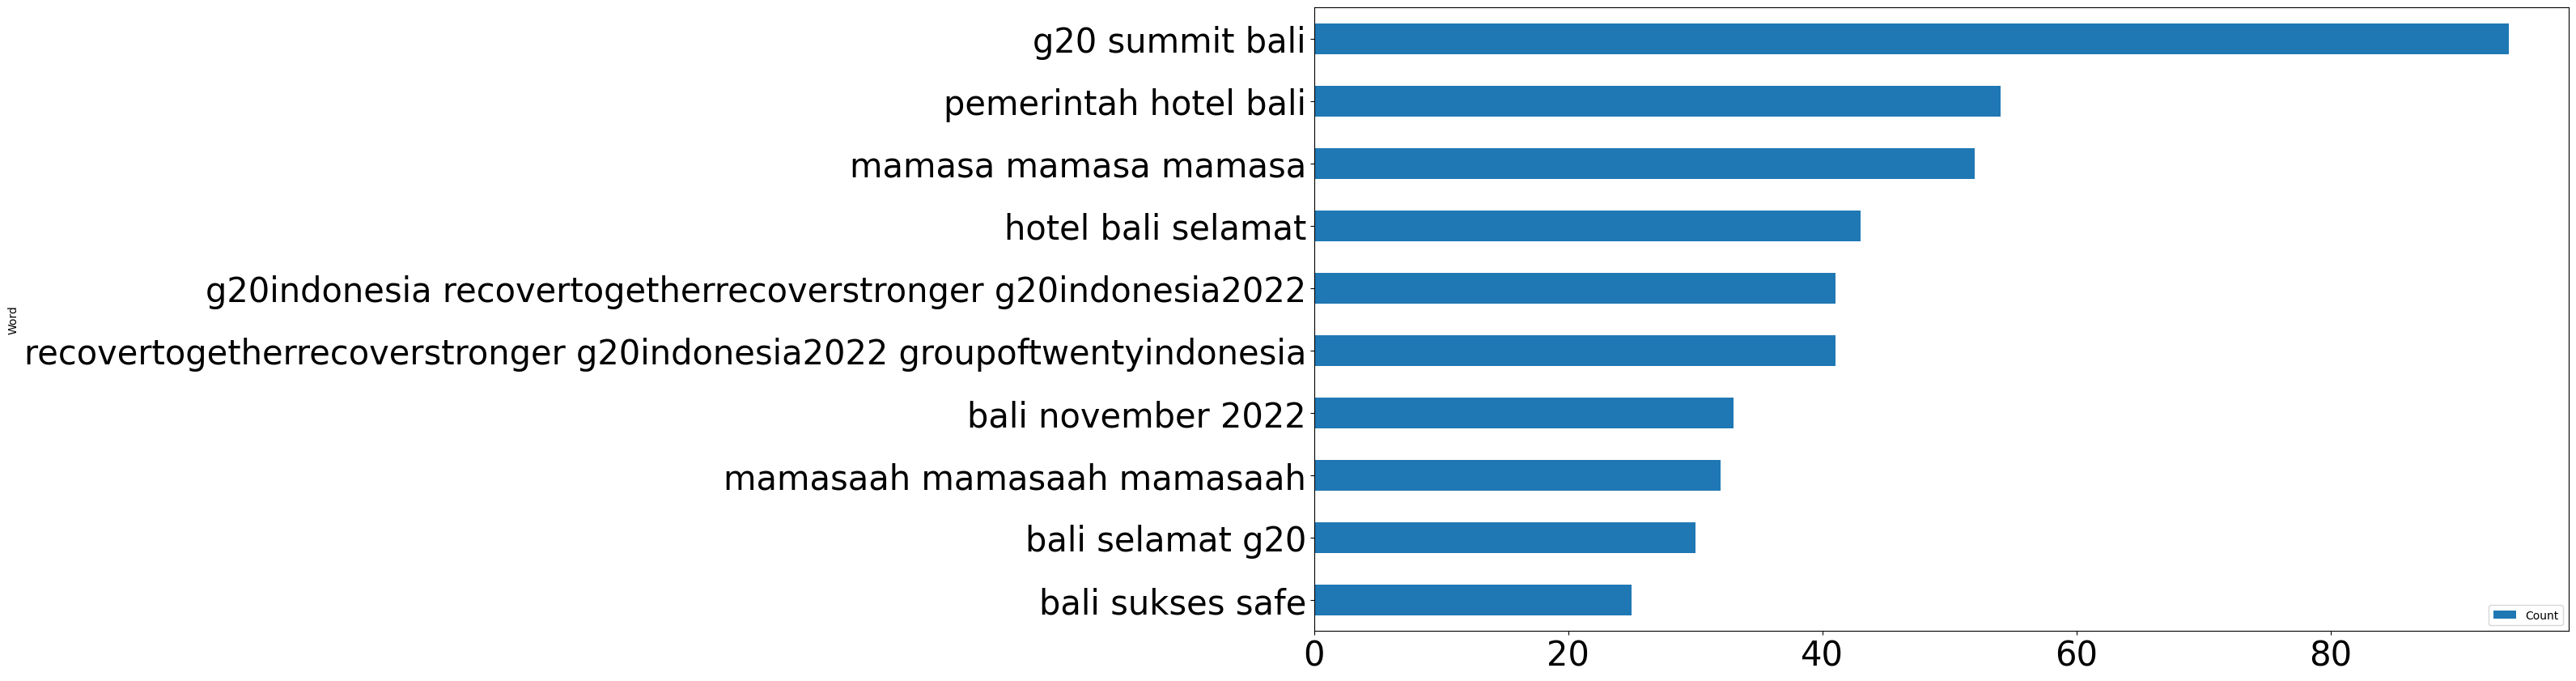

In [43]:
df_top_positive_tri.head(10).sort_values(by='Count',ascending=True).plot.barh(x='Word', y='Count', rot=0,figsize=(20,10),fontsize=30)
plt.savefig('positif2.png',bbox_inches='tight')

Melihat summary data negative

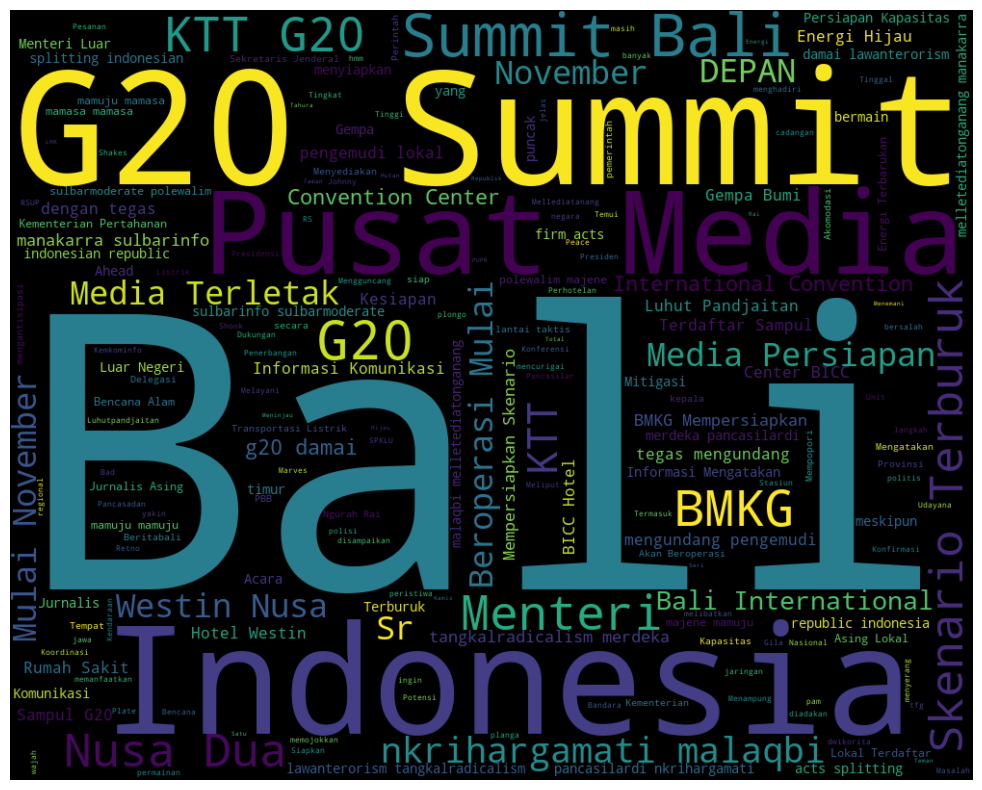

In [44]:
# Plot The Word Cloud
import matplotlib.pyplot as plt
from wordcloud import WordCloud

allWords  = ' '.join( [twts for twts in NEG_data['tweet']])
wordCloud = WordCloud(width = 1000, height=800, random_state=21, max_font_size=400).generate(allWords)

plt.figure( figsize=(20,10) )
plt.imshow(wordCloud, interpolation= 'bilinear')
plt.axis('off')
plt.show()

In [45]:
# Unigrams
negative_unigrams = defaultdict(int)

for tweet in NEG_data['tweet']:
    for word in generate_ngrams(tweet):
        negative_unigrams[word] += 1
         
df_top_negative = pd.DataFrame(sorted(negative_unigrams.items(), key=lambda x: x[1])[::-1])
df_top_negative = df_top_negative.rename(columns={0:'Word',1:'Count'})

# Bigrams
negative_bigrams = defaultdict(int)

for tweet in NEG_data['tweet']:
    for word in generate_ngrams(tweet,n_gram=2):
        negative_bigrams[word] += 1
        
df_top_negative_bi = pd.DataFrame(sorted(negative_bigrams.items(), key=lambda x: x[1])[::-1])
df_top_negative_bi = df_top_negative_bi.rename(columns={0:'Word',1:'Count'})

# Trigrams
negative_trigrams = defaultdict(int)

for tweet in NEG_data['tweet']:
    for word in generate_ngrams(tweet,n_gram=3):
        negative_trigrams[word] += 1
        
df_top_negative_tri = pd.DataFrame(sorted(negative_trigrams.items(), key=lambda x: x[1])[::-1])
df_top_negative_tri = df_top_negative_tri.rename(columns={0:'Word',1:'Count'})

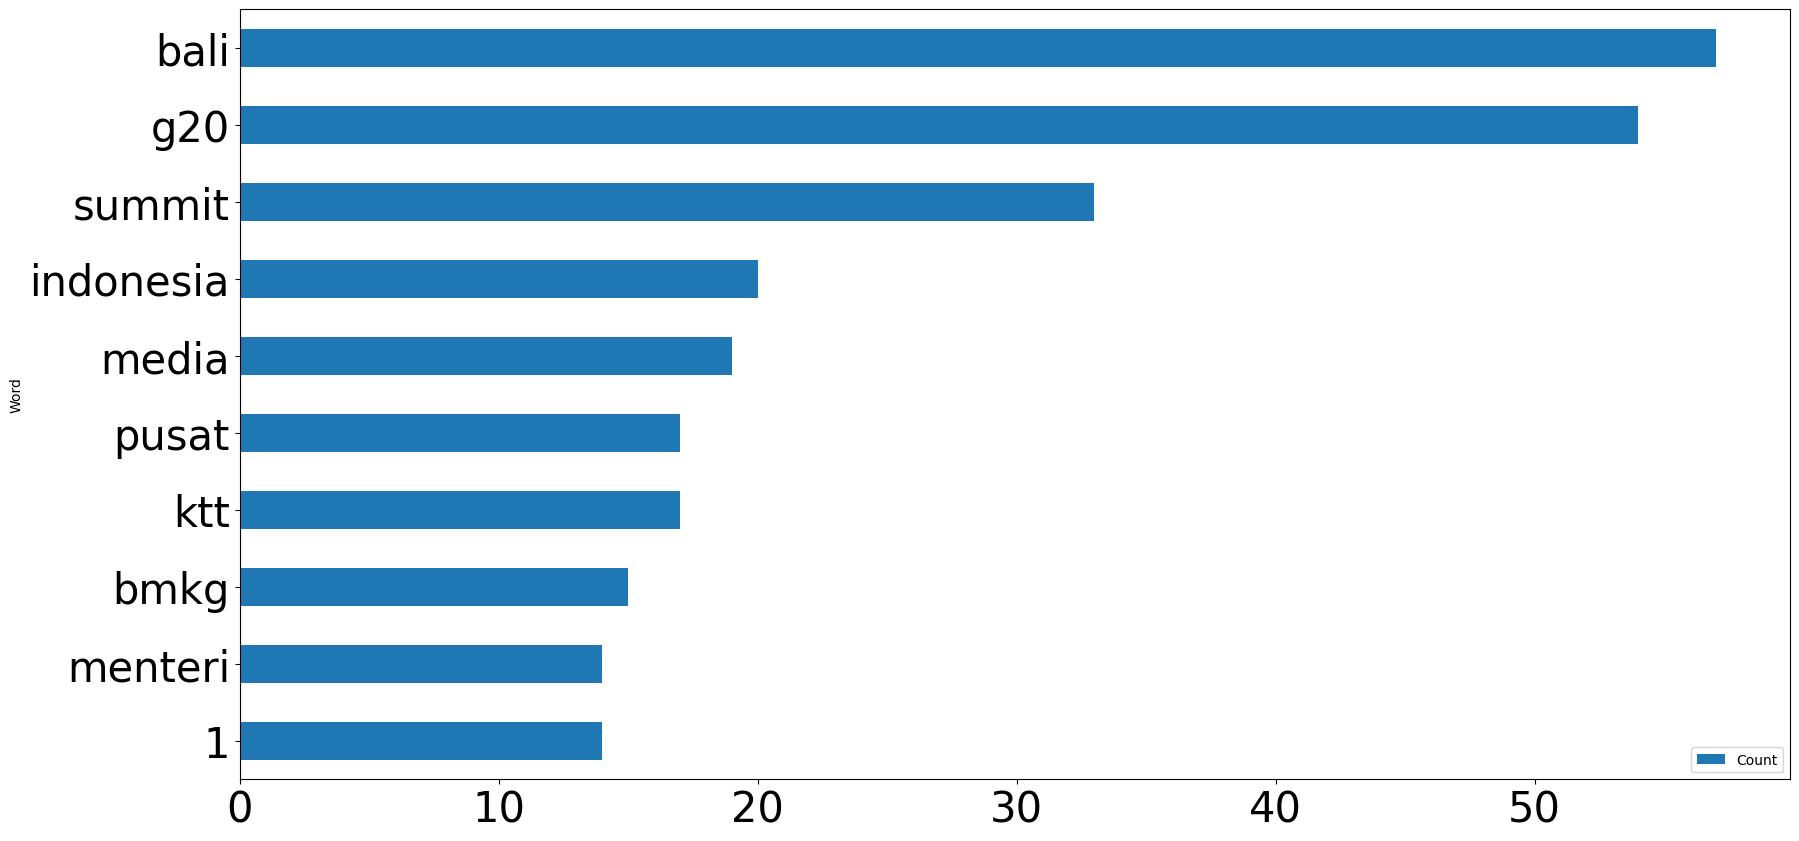

In [46]:
df_top_negative.head(10).sort_values(by='Count',ascending=True).plot.barh(x='Word', y='Count', rot=0,figsize=(20,10),fontsize=30)
plt.savefig('negatif.png',bbox_inches='tight')

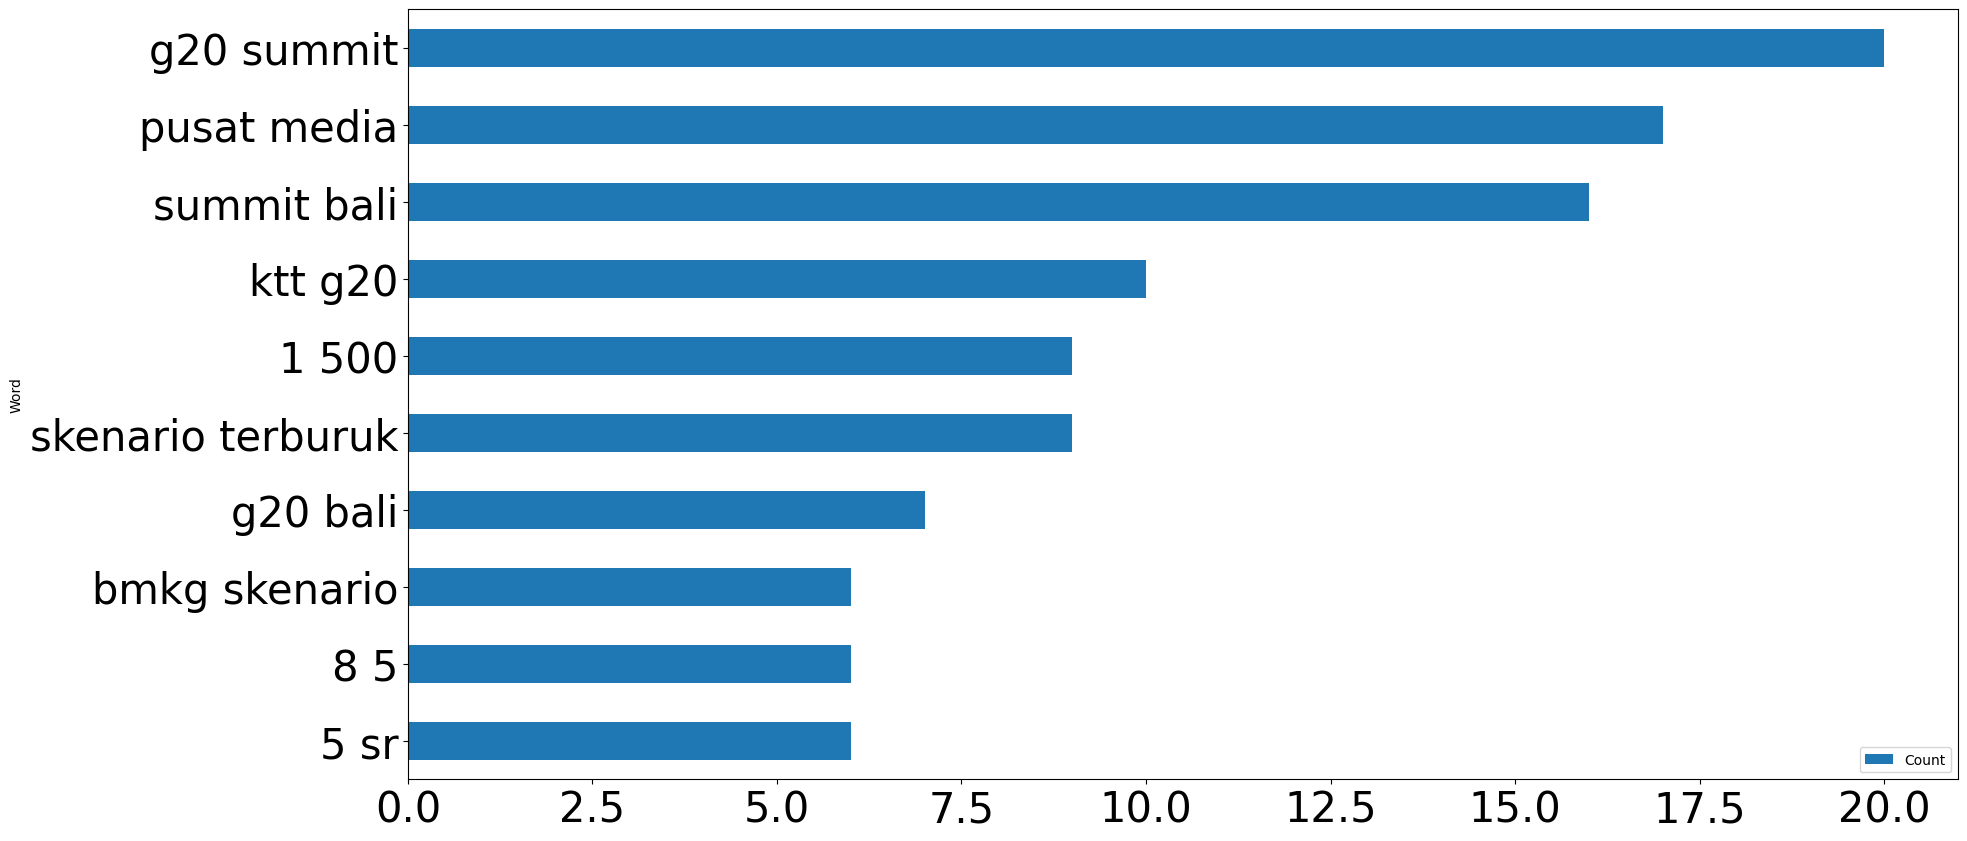

In [47]:
df_top_negative_bi.head(10).sort_values(by='Count',ascending=True).plot.barh(x='Word', y='Count', rot=0,figsize=(20,10),fontsize=30)
plt.savefig('negatif1.png',bbox_inches='tight')

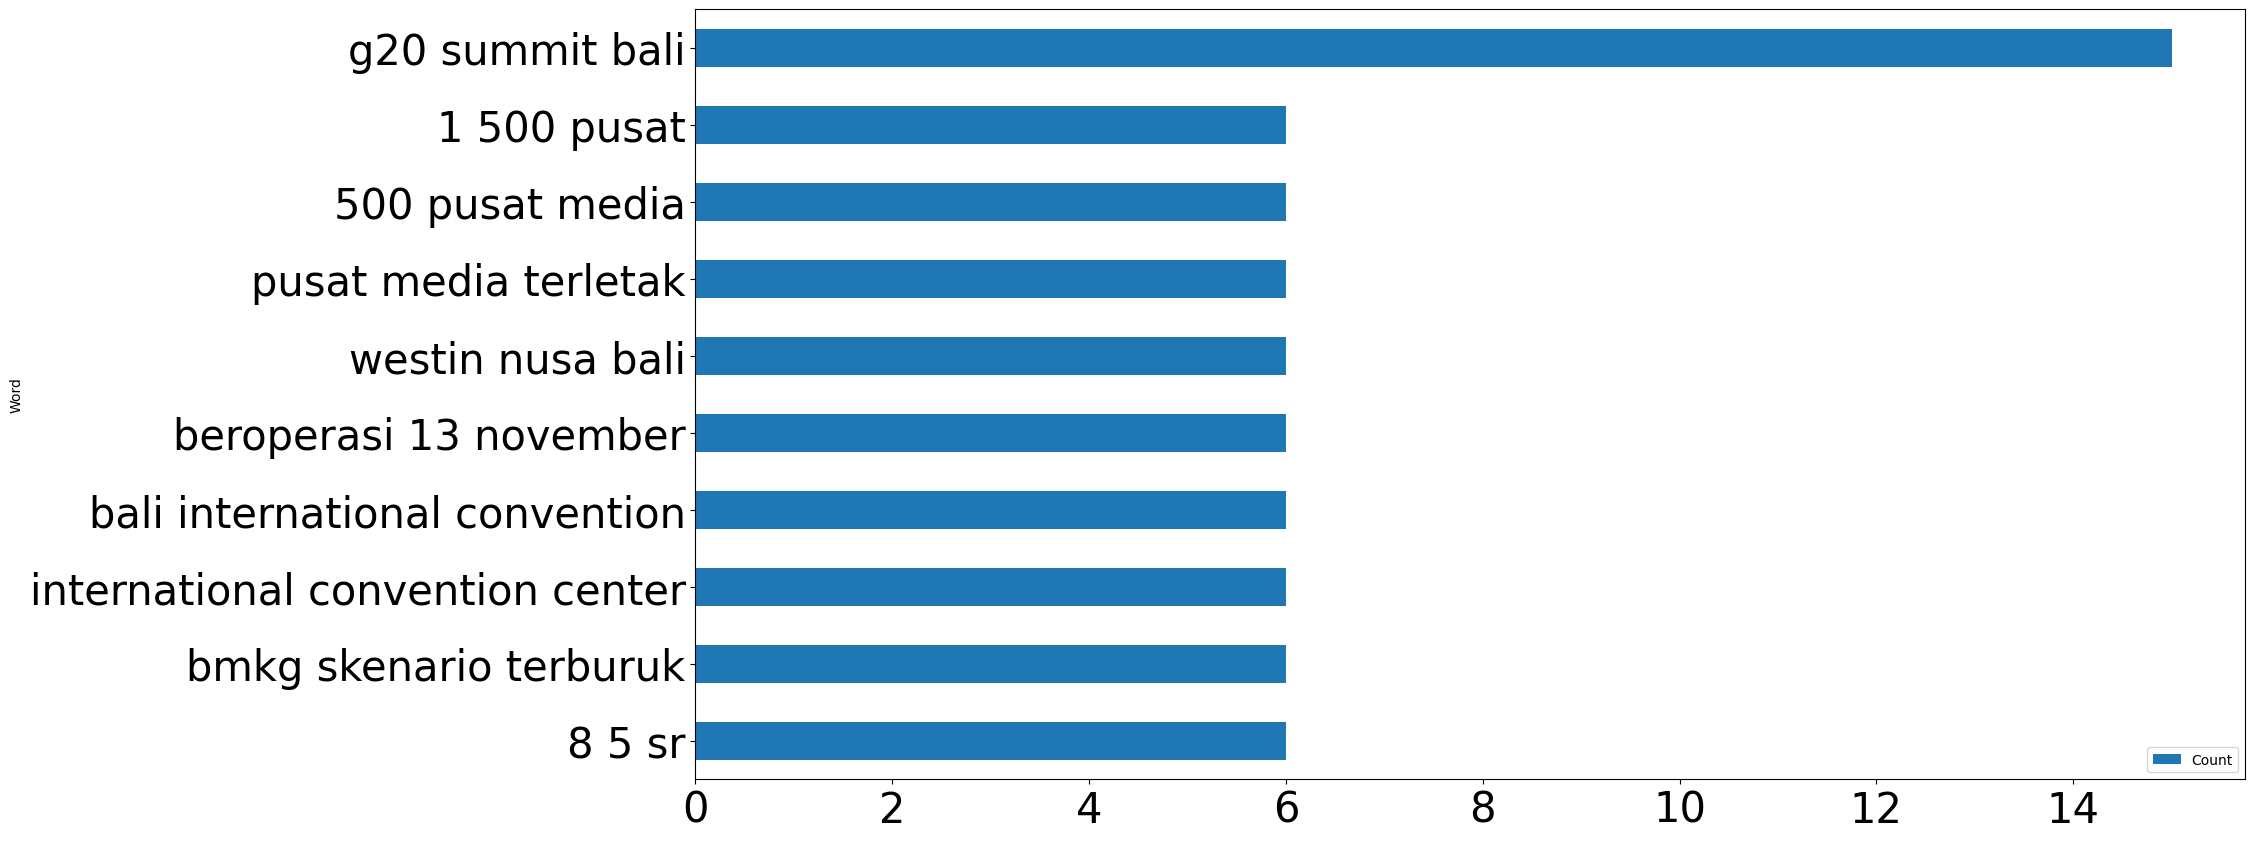

In [48]:
df_top_negative_tri.head(10).sort_values(by='Count',ascending=True).plot.barh(x='Word', y='Count', rot=0,figsize=(20,10),fontsize=30)
plt.savefig('negatif2.png',bbox_inches='tight')

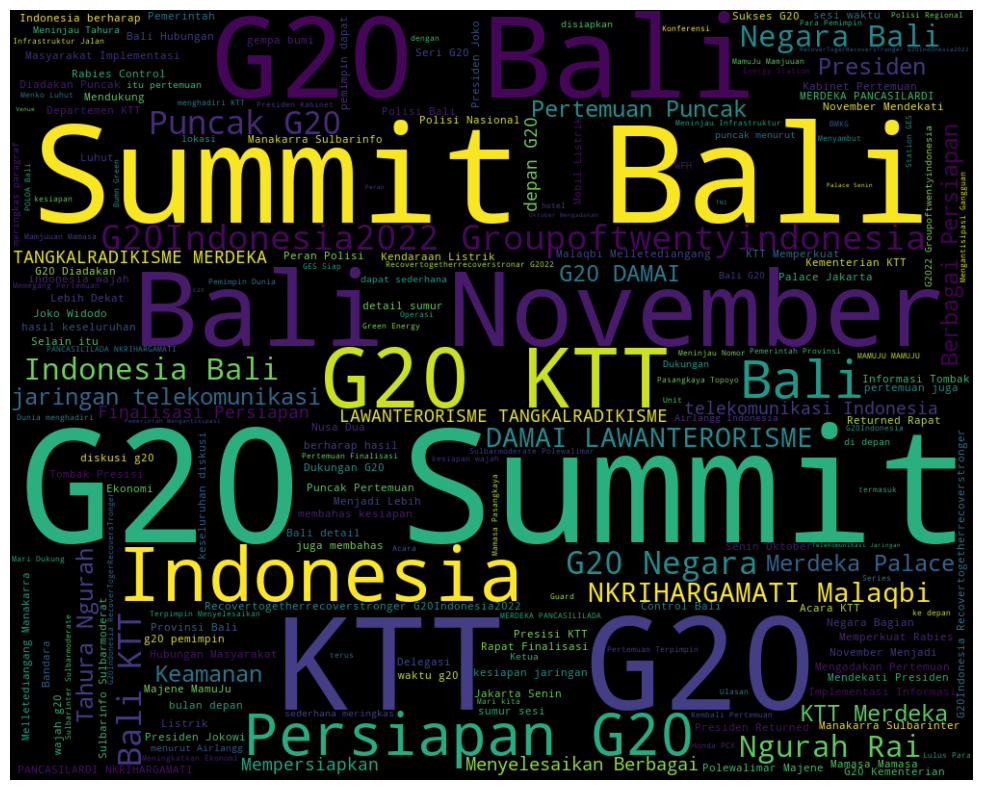

In [49]:
# Plot The Word Cloud
import matplotlib.pyplot as plt
from wordcloud import WordCloud

allWords  = ' '.join( [twts for twts in NET_data['tweet']])
wordCloud = WordCloud(width = 1000, height=800, random_state=21, max_font_size=400).generate(allWords)

plt.figure( figsize=(20,10) )
plt.imshow(wordCloud, interpolation= 'bilinear')
plt.axis('off')
plt.show()

In [50]:
# Unigrams
neutral_unigrams = defaultdict(int)

for tweet in NET_data['tweet']:
    for word in generate_ngrams(tweet):
        neutral_unigrams[word] += 1
         
df_top_neutral = pd.DataFrame(sorted(neutral_unigrams.items(), key=lambda x: x[1])[::-1])
df_top_neutral = df_top_neutral.rename(columns={0:'Word',1:'Count'})

# Bigrams
neutral_bigrams = defaultdict(int)

for tweet in NET_data['tweet']:
    for word in generate_ngrams(tweet,n_gram=2):
        neutral_bigrams[word] += 1
        
df_top_neutral_bi = pd.DataFrame(sorted(neutral_bigrams.items(), key=lambda x: x[1])[::-1])
df_top_neutral_bi = df_top_neutral_bi.rename(columns={0:'Word',1:'Count'})

# Trigrams
neutral_trigrams = defaultdict(int)

for tweet in NET_data['tweet']:
    for word in generate_ngrams(tweet,n_gram=3):
        neutral_trigrams[word] += 1
        
df_top_neutral_tri = pd.DataFrame(sorted(neutral_trigrams.items(), key=lambda x: x[1])[::-1])
df_top_neutral_tri = df_top_neutral_tri.rename(columns={0:'Word',1:'Count'})

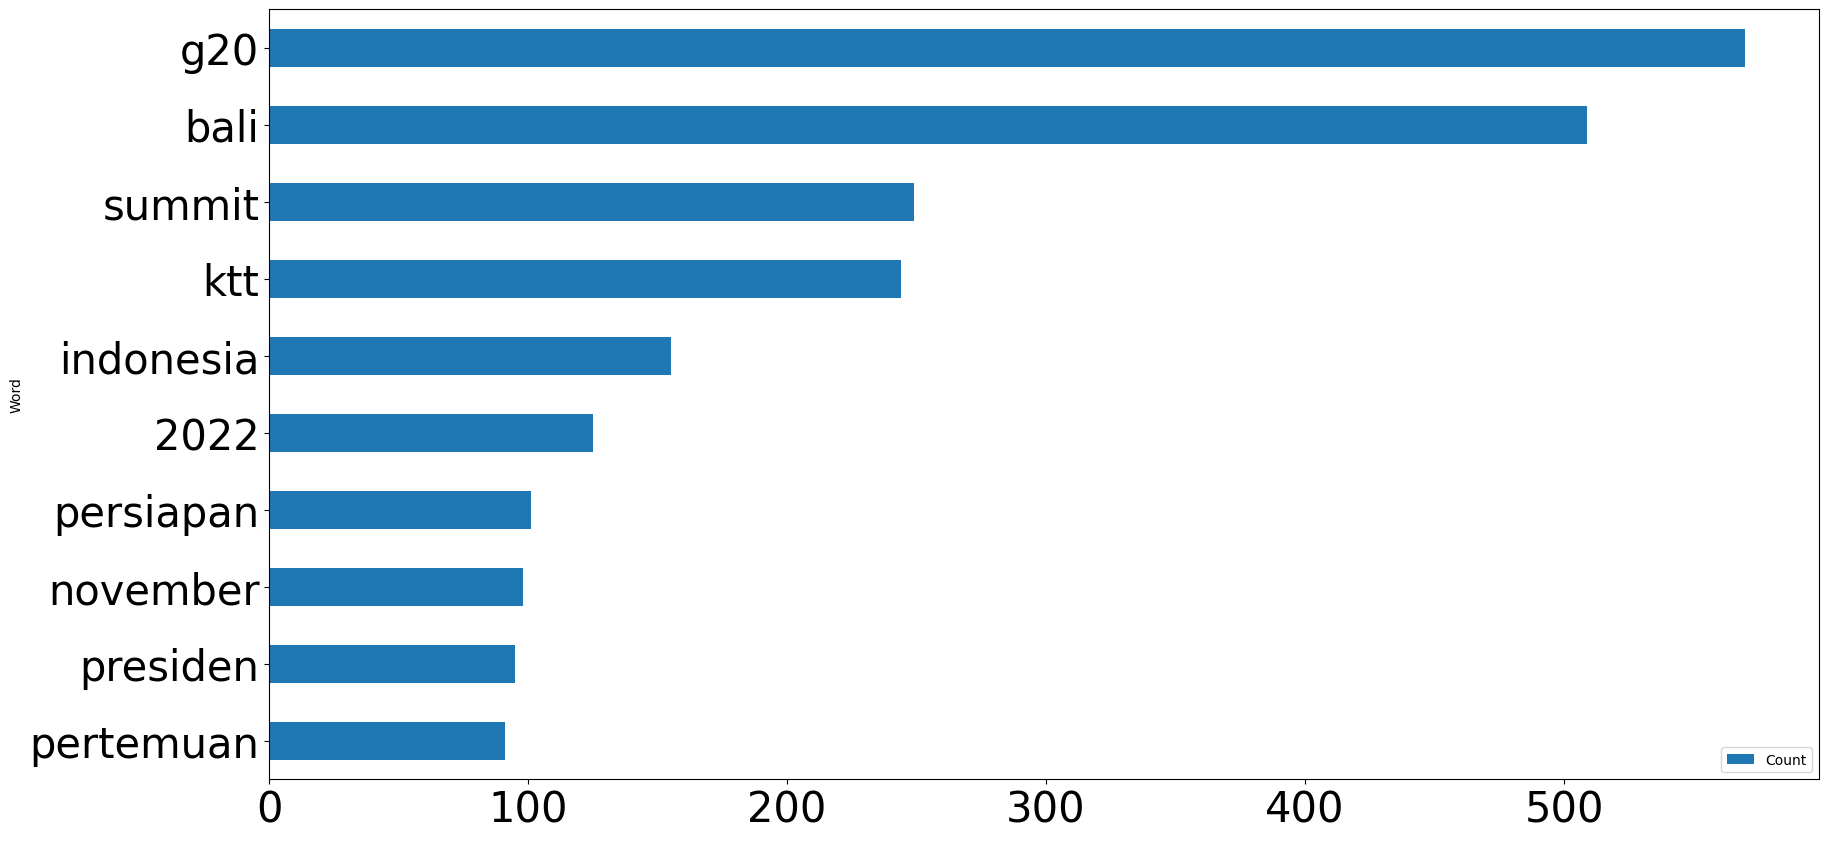

In [51]:
df_top_neutral.head(10).sort_values(by='Count',ascending=True).plot.barh(x='Word', y='Count', rot=0,figsize=(20,10),fontsize=30)
plt.savefig('netral.png',bbox_inches='tight')

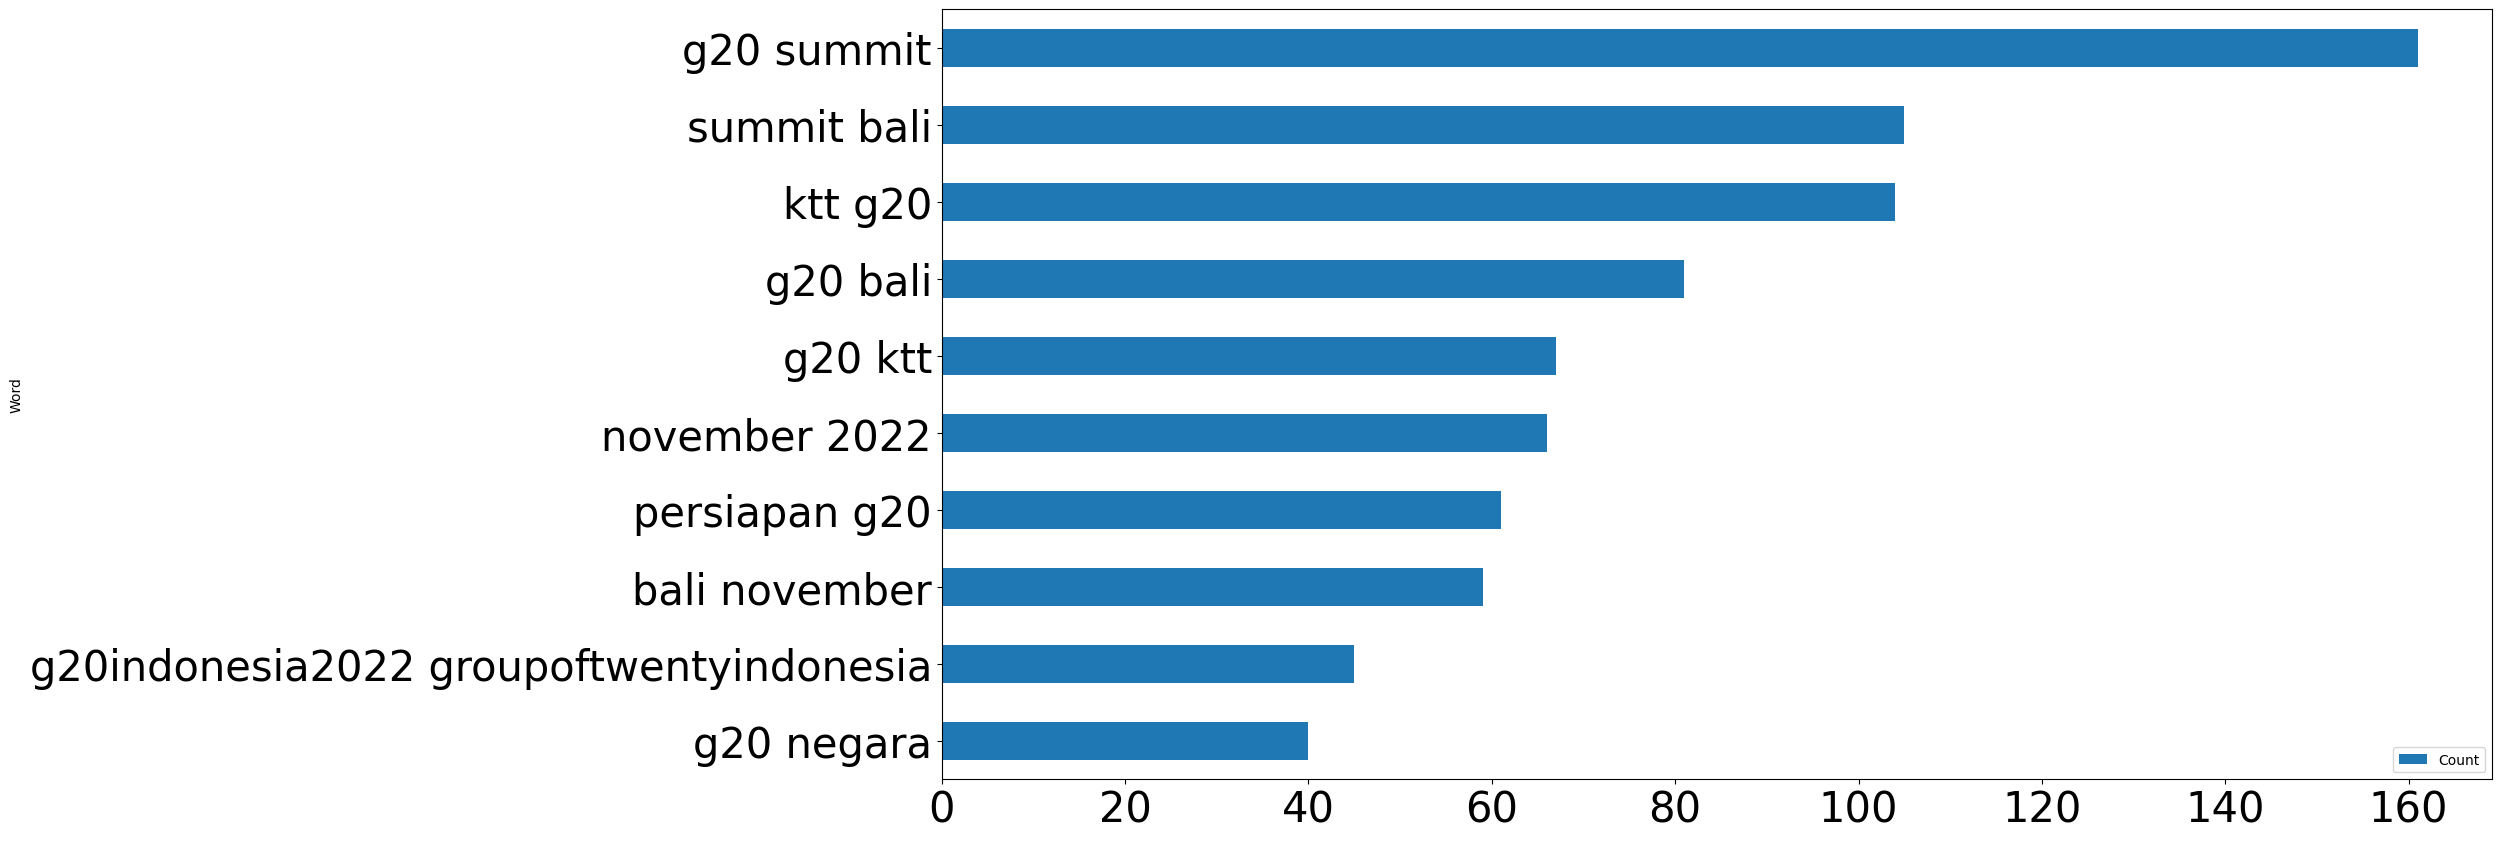

In [52]:
df_top_neutral_bi.head(10).sort_values(by='Count',ascending=True).plot.barh(x='Word', y='Count', rot=0,figsize=(20,10),fontsize=30)
plt.savefig('netral2.png',bbox_inches='tight')

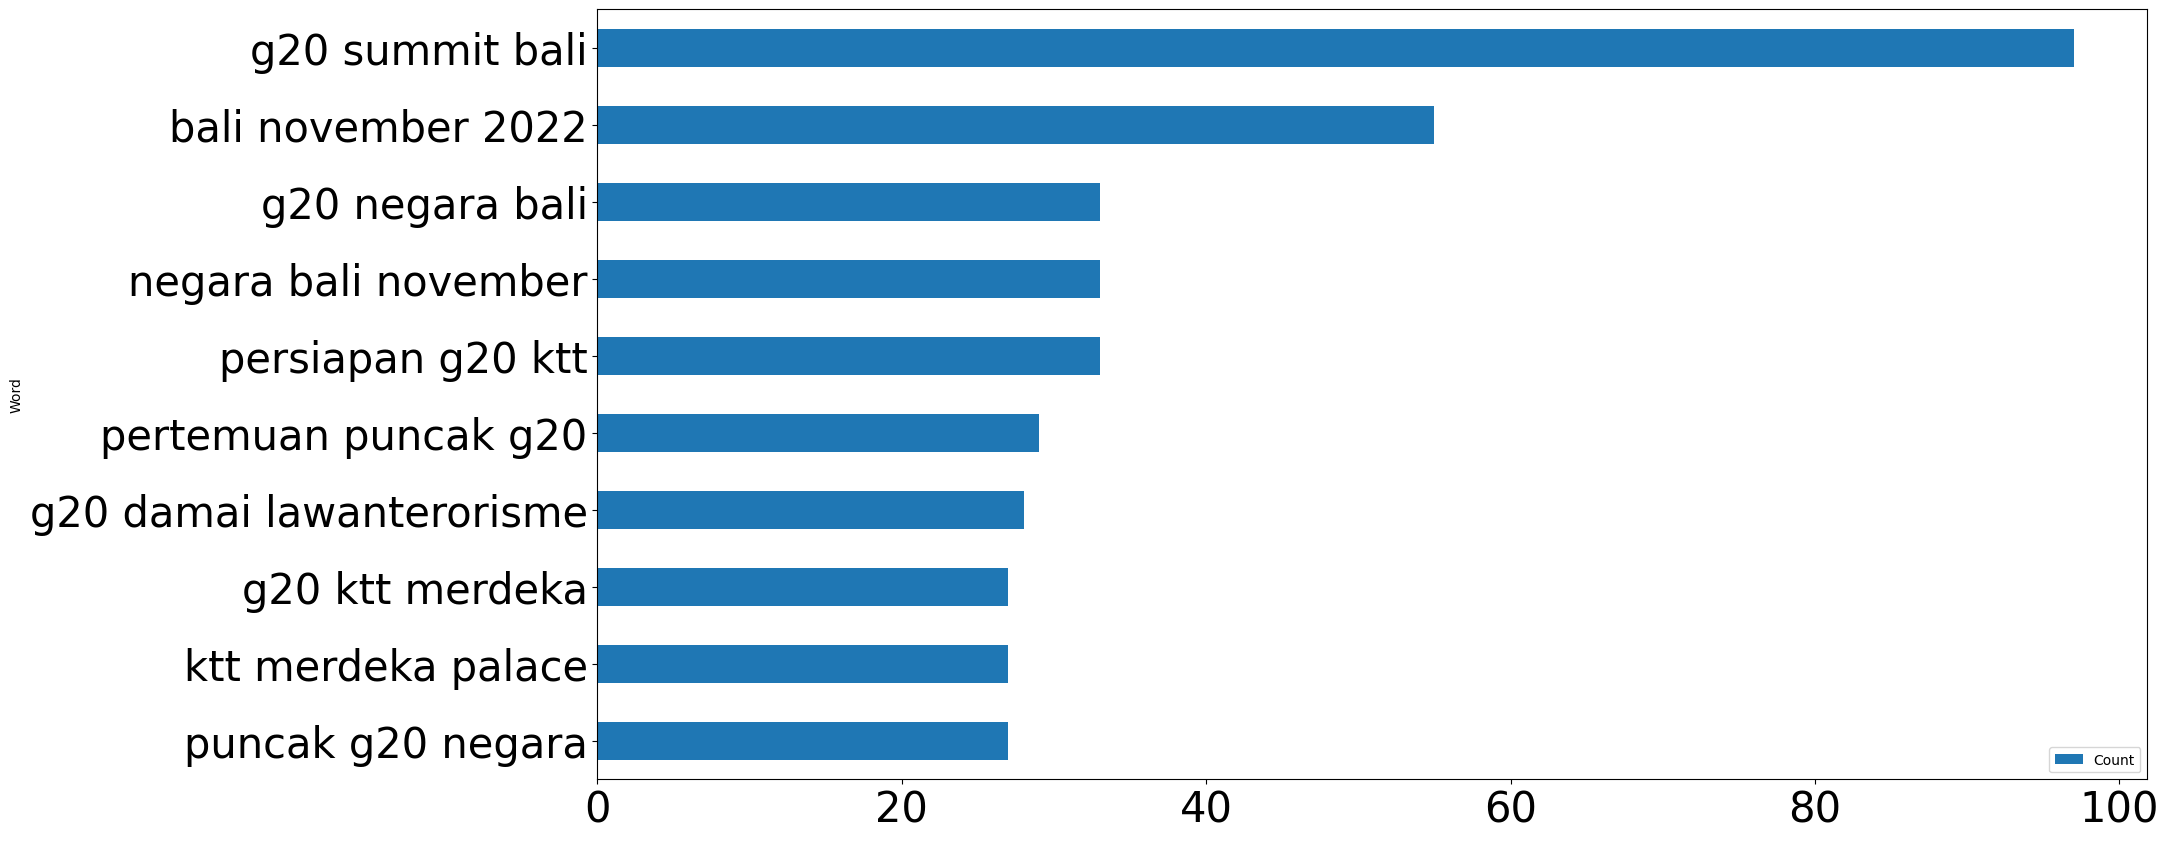

In [53]:
df_top_neutral_tri.head(10).sort_values(by='Count',ascending=True).plot.barh(x='Word', y='Count', rot=0,figsize=(20,10),fontsize=30)
plt.savefig('netral3.png',bbox_inches='tight')

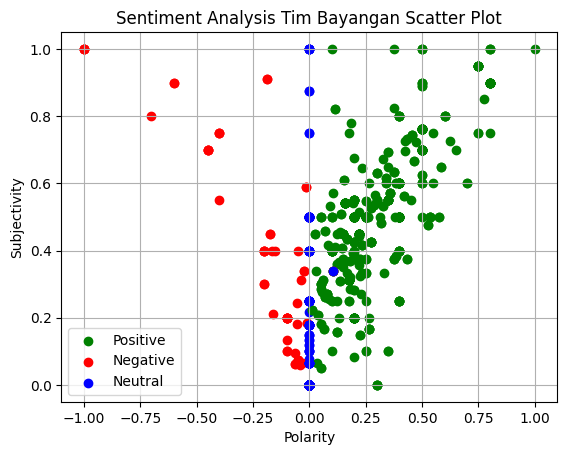

In [54]:
from cProfile import label


for index,row in fix_data.iterrows():
    if row['Analysis']=='Positive':
        plt.scatter(row['Polarity'],row['Subjectivity'],color='green')
    elif row['Analysis']=='Negative':
        plt.scatter(row['Polarity'],row['Subjectivity'],color='red')
    else:
        plt.scatter(row['Polarity'],row['Subjectivity'],color='blue') 
        
plt.scatter(row['Polarity'],row['Subjectivity'],color='green', label='Positive')    
plt.scatter(row['Polarity'],row['Subjectivity'],color='red', label='Negative')
plt.scatter(row['Polarity'],row['Subjectivity'],color='blue', label='Neutral') 
plt.title('Sentiment Analysis Tim Bayangan Scatter Plot')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.legend(loc='best')
plt.grid()
plt.show()